In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=f8955ab879bdafe8af2a6689d079328d1f4e2d938314f2b134967b53c7c3d0d8
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

# 학습시간 대비 합격 데이터
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [3]:
#통과 시간 탈락 시간 합치기 
x = np.hstack((pass_time,fail_time))


In [4]:
y1 = [1] * len(pass_time)
y2 = [0] * len(fail_time)

y = np.hstack((y1,y2))

y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

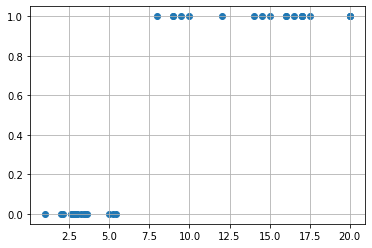

In [5]:
#시각화
plt.scatter(x,y)
plt.grid()

In [6]:
#모델 학습 
model = LogisticRegression()
model.fit(x.reshape(-1,1),y)
model.coef_ , model.intercept_

(array([[1.32952239]]), array([-9.1854821]))

In [7]:
#예측 
predict_y = model.predict([[7.0],[6.9]])
predict_y 
model.predict([[7.0]]) #array([1])

#확률로 보기 
model.predict_proba([[7.0]]) #array([[0.46974336, 0.53025664]])

array([[0.46974336, 0.53025664]])

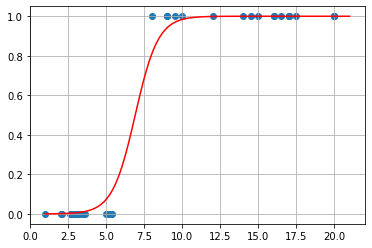

In [8]:
#sigmoid 시각화 
def logreg(z):
  return 1/(1+np.exp(-z))

xx = np.linspace(1,21,100)
yy = logreg(model.coef_ * xx + model.intercept_)[0]

plt.plot(xx,yy,color = 'red')
plt.scatter(x,y)
plt.grid()


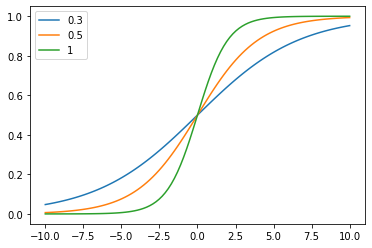

In [9]:
#가중치 만 바꿨을떄 
w_list = [0.3,0.5,1]
b_list = [0]

xx = np.linspace(-10,10,100)
for w in w_list:
  for b in b_list:
    yy = logreg(w * xx + b) #가중치 별로 편향을 더해서 새로운 그래프를 만듬
    plt.plot(xx,yy,label = f'{w}') #그래프를 출력 
    plt.legend()

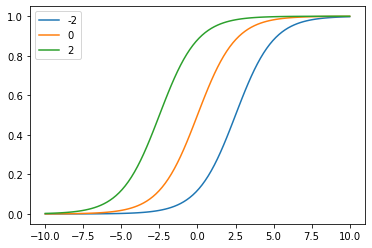

In [10]:
w_list = [0.8]  # 가중치
b_list = [-2,0,2]# 편향  = 평행 이동
xx = np.linspace(-10,10,100)
for w in w_list:
  for b in b_list:
    yy = logreg(w * xx + b)
    plt.plot(xx,yy,label = f'{b}')
    plt.legend()

###LogisticRegression 실습 2


In [11]:
#forge 데이터 셋 이용 
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt 
import numpy as np 
import mglearn 
from sklearn.linear_model import LogisticRegression



In [12]:
C = [100,10,1,0.1,0.01]
labels = ['100','10','1','0.1','0.01']
x,y = make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


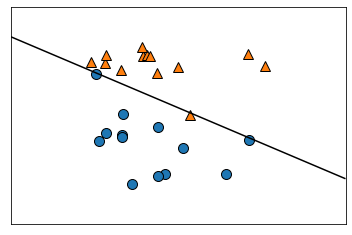

In [13]:
model = LogisticRegression(C = 100).fit(x,y)
mglearn.plots.plot_2d_separator(model,x)
mglearn.discrete_scatter(x[:,0],x[:,1],y)  
plt.show() 


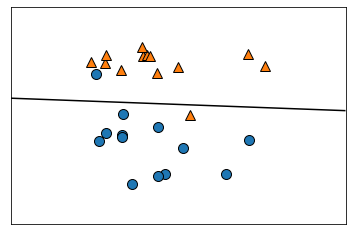

'\n규제 값이 커지면 경계 를 나누는데 이상치가 발생 \n규제가 값이 작아지면 완만한 곡선을 탄다.\n'

In [14]:
#C 값을 변경 하면서 학습이나 데이터 의 경계 부분이 어떻게 바뀌는지 보자 
model = LogisticRegression(C = 0.01).fit(x,y)
mglearn.plots.plot_2d_separator(model,x)
mglearn.discrete_scatter(x[:,0],x[:,1],y)  
plt.show() 
'''
규제 값이 커지면 경계 를 나누는데 이상치가 발생 
규제가 값이 작아지면 완만한 곡선을 탄다.
'''

###Logistic Regression 3

유방암 데이터 분석

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target



In [16]:
#train_test_split 
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)


In [17]:
#C 값에 따라 정확도 를 비교 

for c in C:
  model = LogisticRegression(C = c , max_iter = 10000).fit(train_x,train_y)
  print(c,':',model.score(train_x,train_y),model.score(test_x,test_y))

'''
규제 값이 낮을수록 train 과 test 사이에 정확도 의 편차가 줄어든다 
규제 값이 크면 학습 데이터 의 정확도만 잘나온다 -> 과적합 
'''


100 : 0.9812206572769953 0.958041958041958
10 : 0.9694835680751174 0.958041958041958
1 : 0.960093896713615 0.951048951048951
0.1 : 0.9577464788732394 0.9440559440559441
0.01 : 0.9530516431924883 0.9440559440559441


'\n규제 값이 낮을수록 train 과 test 사이에 정확도 의 편차가 줄어든다 \n규제 값이 크면 학습 데이터 의 정확도만 잘나온다 -> 과적합 \n'

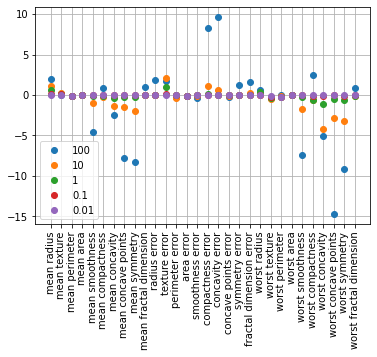

'\n가중치 값도 값이 작을 수록 다른 데이터 에 영향 안주도록 비슷 하다 \n'

In [18]:
#규제 변수 c 설정을 가르게 하여 학습 시킨 모델의 개수 표시 

for c,l in zip(C,labels):
  model = LogisticRegression(C = c , max_iter = 10000).fit(train_x,train_y)
  plt.plot(model.coef_.T,'o',label = l)
  plt.xticks(range(30),cancer.feature_names,rotation = 90)
plt.legend()
plt.grid()
plt.show()
'''
가중치 값도 값이 작을 수록 다른 데이터 에 영향 안주도록 비슷 하다 
'''



In [19]:
#C를 L1 규제의 패널티 적용 하여 정확도 계산 

for c in C:
  model = LogisticRegression(C = c,penalty='l1',max_iter = 10000,solver = 'liblinear')
  model.fit(train_x,train_y)
  print('C:{}'.format(c),model.score(train_x,train_y),model.score(test_x,test_y))

'''
L1 규제를 적용해도 c 값이 크 면 학습 데이터 셋에는 기가막히게 잘나온다.
과대적합 유발 
lasso 규제를 적용하니까 전체적인 가중치의 값이 줄어들어 학습 셋도 떨어지는 현상을 볼수 있다.
'''




C:100 0.9906103286384976 0.9440559440559441
C:10 0.9741784037558685 0.972027972027972
C:1 0.9624413145539906 0.958041958041958
C:0.1 0.9366197183098591 0.9300699300699301
C:0.01 0.9178403755868545 0.9370629370629371


'\nL1 규제를 적용해도 c 값이 크 면 학습 데이터 셋에는 기가막히게 잘나온다.\n과대적합 유발 \nlasso 규제를 적용하니까 전체적인 가중치의 값이 줄어들어 학습 셋도 떨어지는 현상을 볼수 있다.\n'

###LogisticRegression 4 
와인 데이터 분류 

In [20]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

wine = load_wine()

df = pd.DataFrame(wine.data,columns = wine.feature_names)
df['class'] = wine.target
df.head(3)



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [21]:
#train_test_split
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)



In [22]:
#model 생성 및 학습 정확도 평가 
for c in C:
  model = LogisticRegression(C = c,max_iter = 10000)
  model.fit(train_x,train_y)

  print('C:{}/'.format(c) , model.score(train_x,train_y),model.score(test_x,test_y))



C:100/ 1.0 0.9777777777777777
C:10/ 1.0 0.9777777777777777
C:1/ 0.9924812030075187 0.9777777777777777
C:0.1/ 0.9774436090225563 0.9555555555555556
C:0.01/ 0.9323308270676691 0.9777777777777777


In [23]:
#predict 예측 

pred_y = model.predict(test_x)
print(test_y.values)
print(pred_y)

np.mean(np.equal(pred_y,test_y))

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]
[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 1 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


0.9777777777777777

###LogisticRegression 실습 5
wave 데이터 를 이용한 다중 분류

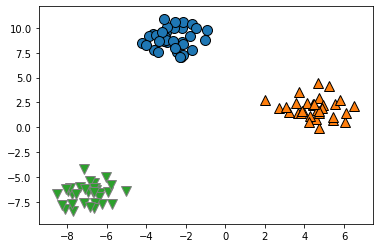

In [24]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np 

x,y = make_blobs(random_state = 42) #random state 결과가 완벽하게 분류 하기 좋게 나눠져 있다.

mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.show()

In [25]:
#train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)

model = LogisticRegression(C= 1,max_iter = 10000).fit(train_x,train_y)



In [26]:
#model.predict
pred_y = model.predict(test_x)

In [27]:
#model 의 기울기 편향 계산
model.coef_,model.intercept_
train_x.shape,train_y.shape

((75, 2), (75,))

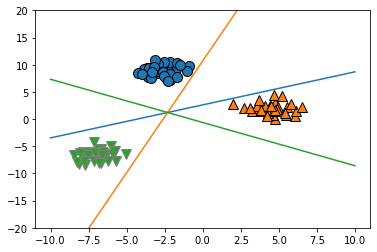

In [28]:
#시각화 
xx = np.linspace(-10,10 ,50)
for coef,intercept in zip(model.coef_,model.intercept_):
  yy = -(coef[0] * xx + intercept) / coef[1]
  plt.plot(xx,yy)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.ylim(-20,20)
plt.show()

###LogisticRegression 실습 06 
붓꽃 데이터 셋을 이용한 다중 분류 



In [29]:
#데이터 로드 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

In [30]:
#데이터 분리 
x = iris.data
y = iris.target

x = iris.data[:,2:] #x 데이터는 2개만 사용 결정경계 영역을 나누기 위해서 
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)




In [31]:
#logistic Regression
model = LogisticRegression(C = 1, max_iter= 10000).fit(train_x,train_y)
print(model.score(train_x,train_y), model.score(test_x,test_y))

model.coef_,model.intercept_

0.9732142857142857 0.9736842105263158


(array([[-2.52611964, -1.05841164],
        [ 0.06555792, -0.68593061],
        [ 2.46056172,  1.74434225]]),
 array([ 10.0646376 ,   2.76011162, -12.82474923]))

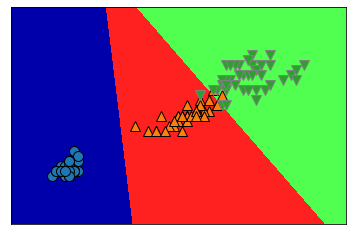

In [32]:
#결정경계 시각화 
mglearn.plots.plot_2d_classification(model,train_x)
mglearn.discrete_scatter(train_x[:,0],train_x[:,1],train_y)
plt.show()

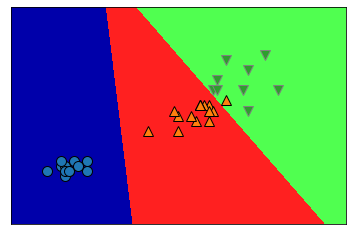

In [33]:
mglearn.plots.plot_2d_classification(model,train_x)
mglearn.discrete_scatter(test_x[:,0],test_x[:,1],test_y)
plt.show()

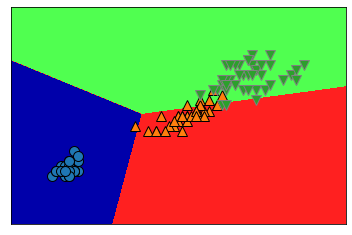

In [34]:
from sklearn.svm import LinearSVC
model_svm = LinearSVC().fit(train_x,train_y)
# 결정경계 시각화 
mglearn.plots.plot_2d_classification(model_svm,train_x) #분류 문제라 결정경계 가 아닌 classification
mglearn.discrete_scatter(train_x[:,0],train_x[:,1],train_y)

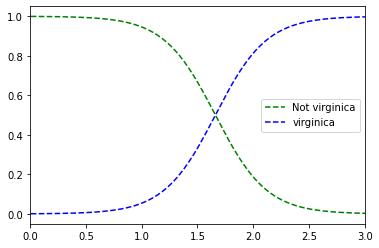

In [41]:
#결정경계 찾기 
#꽃잎 의 너비 가 0~3 cm 인 꽃에 대해 모델의 추정 확률을 계산 
iris = load_iris()
x = iris.data[:,3:]
y = (iris.target == 2).astype(np.int) #target 0~3cm 인 꽃은 target 값이 2이다.


model = LogisticRegression().fit(x,y)
xx = np.linspace(-10,10,500).reshape(-1,1) #1차원 데이터 는 행렬곱 계산이 1차원이면 안된다.

y_proba = model.predict_proba(xx) #xx 에 대한 이진 확률 값 계산 
y_proba


plt.plot(xx,y_proba[:,0],'g--',label = 'Not virginica') #실패 할 확률
plt.plot(xx,y_proba[:,1],'b--',label = 'virginica') #성공할 확률
plt.legend()
plt.xlim(0,3)
plt.show()
'''
두개의 선이 교차 하는 지점이 길이 에 대한 결정 경계 
'''


### Logistic Regression 실습 07
유방 암 데이터 를 가지고 모델 비교

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   # K-fold cross validation 교차 검증 검증 데이터 사용시 적용 
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

In [46]:
#유방암 데이터 로드 
cancer = load_breast_cancer()
print(cancer.target_names)

df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
df.head(3)

['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [47]:
#target 데이터 시리즈 저장 
df['class'] = cancer.target


In [51]:
#x,y 분류  + train_test_split
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)



In [58]:
#model 
model = LogisticRegression(C = 1,max_iter = 10000).fit(train_x,train_y)
model.score(train_x,train_y) , model.score(test_x,test_y)



(0.960093896713615, 0.951048951048951)

In [59]:
#KNN 에 적용 default n_neighbors  = 5
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,21,2):
  model = KNeighborsClassifier(n_neighbors= i)
  model.fit(train_x,train_y)
  print('이웃수: {} , train_score: {} , test_score: {}'.format(i , model.score(train_x,train_y) , model.score(test_x,test_y)))
  '''
  이웃수가 늘어나면 학습 점수는 낮아지지만 테스트 점수는 올라간다... 
  '''

이웃수: 1 , train_score: 1.0 , test_score: 0.916083916083916
이웃수: 3 , train_score: 0.9577464788732394 , test_score: 0.9230769230769231
이웃수: 5 , train_score: 0.9413145539906104 , test_score: 0.9370629370629371
이웃수: 7 , train_score: 0.9389671361502347 , test_score: 0.9440559440559441
이웃수: 9 , train_score: 0.9366197183098591 , test_score: 0.958041958041958
이웃수: 11 , train_score: 0.9366197183098591 , test_score: 0.958041958041958
이웃수: 13 , train_score: 0.9342723004694836 , test_score: 0.958041958041958
이웃수: 15 , train_score: 0.9366197183098591 , test_score: 0.958041958041958
이웃수: 17 , train_score: 0.9295774647887324 , test_score: 0.958041958041958
이웃수: 19 , train_score: 0.9295774647887324 , test_score: 0.958041958041958


In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(train_x,train_y)
model.score(train_x,train_y) , model.score(test_x,test_y)

(1.0, 0.8671328671328671)

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100).fit(train_x,train_y)
model.score(train_x,train_y) ,model.score(test_x,test_y)

(1.0, 0.965034965034965)

#### 소프트맥스

- 세 개 이상 입력 값을 다루기 위함(다중분류)
- 다항 로지스틱스

> \\( { y }_{ k }=\frac { exp({ a }_{ k }) }{ \sum _{ i=1 }^{ n }{ exp({ a }_{ i }) }  }  \\)

다중분류를 각각의 선을 그리는게 아니라 
결과 값에 대한 확률 로 만들어 가장 높은 값이 그 값이 라고 판단하는 활성화 함수 


In [64]:
#수식 버전으로 softmax 확률 계산
score = [-1,-0.5,1.0,1.5] #자연 상수 의 지수 값
prob = []
sum = 0

for i in score:
  prob.append(np.exp(i))  #자연 상수 값을 저장
  sum+=np.exp(i) #각각의 값을 합함

prob = prob/sum #softmax  = 해당 원소의 자연상수 값 / 모든 자연상수 값의 합 = 확률 

print(prob) #각각의 원소의 확률 출력
print(np.sum(prob)) #확률의 합은 1

[0.04500395 0.07419897 0.33253672 0.54826036]
1.0


In [65]:
#함수 버전으로 softmax 작성 
def softmax(a):
  prob = []
  sum = 0
  for i in a:
    prob.append(np.exp(i))
    sum+=np.exp(i)
  
  prob = prob/sum
  return prob
    

In [68]:
a = np.array([1,2,3,4])
print(softmax(a))



[0.0320586  0.08714432 0.23688282 0.64391426]


In [74]:
#overflow 지수 승 이 너무 커서 무한대 현상이 발생한것을 방지한 softmax
def softmax_a(a):
  prob = []
  sum = 0
  max_x = np.max(a)
  for i in a:
    prob.append(np.exp(i - max_x))
    sum+=np.exp(i - max_x)
  
  prob = prob / sum
  return prob

In [79]:
a = np.array([700,900,1000])
s = softmax_a(a)

In [80]:
s

array([5.14820022e-131, 3.72007598e-044, 1.00000000e+000])

In [82]:
#로지스틱 회귀에서 다중 분류 사용
iris =load_iris()
x = iris.data[:,2:]
y = iris.target

#model 생성 및 학습
model = LogisticRegression(multi_class='multinomial',C= 1, max_iter =10000) #multi_class : 다중 분류 를 설정하는 매개변수 
model.fit(x,y)

#model 예측 
predict = model.predict_proba([[10,78]]) #세 개의  품종에 대한 예측 확률을 준다
print(predict)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[[4.00269552e-123 2.03521175e-105 1.00000000e+000]]
